## Importing libraries
The `font_manager_rebuild()` is required to use the fonts that the xkcd style uses.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.font_manager._rebuild()

### Draw a circle
Get yourself familiar with the xkcd style and plotting.

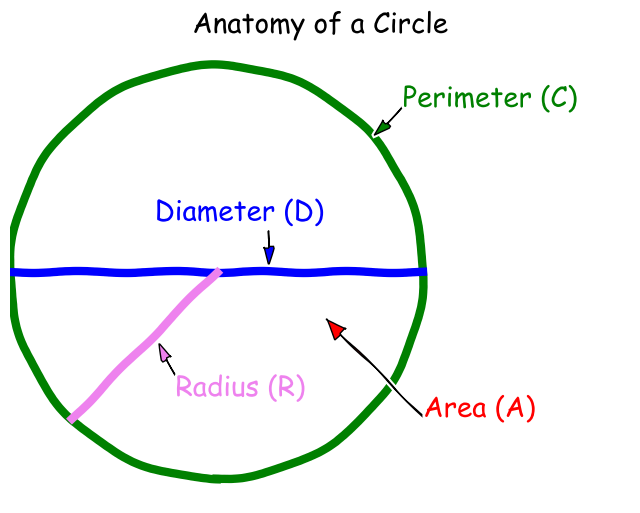

In [5]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,6)) 
    plt.axis('off')
    plt.axis('equal')
    # add circle
    circle1 = plt.Circle((1,1),1, fill = False, color = "g",lw=6)
    ax.add_patch(circle1)
    # add line 
    plt.plot((0,2),(1,1),lw=6,color="b")
    
    # text add arrows
    plt.text(1.9, 1.8, "Perimeter (C)", fontsize=20, color = "g")
    plt.arrow(x=1.9,y=1.8,dx=-0.08,dy=-0.08, head_width=0.05, head_length=0.08, fc="g")
    
    plt.text(0.7, 1.25, "Diameter (D)", fontsize=20, color = "b")
    plt.arrow(x=1.25,y=1.2,dx=0,dy=-0.08, head_width=0.05, head_length=0.08, fc="b")
    
    # area 
    
    plt.text(2.0, 0.3, "Area (A)", fontsize=20, color = "r")
    plt.arrow(x=2.0,y=0.3,dx=-0.4,dy=0.4, head_width=0.08, head_length=0.1, fc="r")
    
    # radius
    plt.text(0.8, 0.4, "Radius (R)", fontsize=20, color = "violet")
    plt.plot((0.30,1),(0.29,1),lw=6,color="violet")
    plt.arrow(x=0.8,y=0.5,dx=-0.04,dy=0.08, head_width=0.05, head_length=0.08, fc="violet")
    ax.set_title("Anatomy of a Circle",fontsize=20)
    ax.set_xlim(0,3)
    ax.set_ylim(-1,3)
    fig.savefig("img1.jpg")

### Use a polygon to approximate a circle

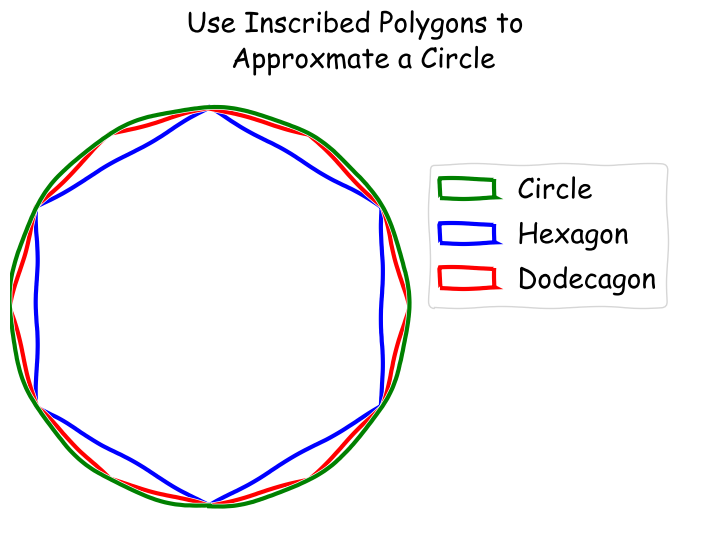

In [6]:
from matplotlib.patches import RegularPolygon
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(9,6)) 
    plt.axis('off')
    plt.axis('equal')
    ax.set_xlim(0,3.5)
    ax.set_ylim(0,2)
    circle2 = plt.Circle((1,1),1, fill = False, color = "g",lw=3)
    polygon6 = RegularPolygon((1,1),numVertices=6,radius=1,fill=False,color = "b",lw=3)
    polygon12 = RegularPolygon((1,1),numVertices=12,radius=1,fill=False,color = "r",lw=3)
    ax.add_patch(polygon6)
    ax.add_patch(polygon12)
    ax.add_patch(circle2)
    ax.legend([circle2,polygon6,polygon12],["Circle","Hexagon","Dodecagon"],loc=[0.6,0.5],fontsize=20)
    ax.set_title("Use Inscribed Polygons to \n Approxmate a Circle",fontsize=20)
    fig.savefig("img2.jpg")

### Code for estimating Pi

In [7]:
import random
random.seed(2021)
pi_values = list()
num_persons = 1000
num_rounds = 20
num_grains = 1000
edge = 10
for r in range(num_rounds):
    for p in range(num_persons):
        in_circle = 0
        for g in range(num_grains):
            x, y = (random.random() - 0.5)*edge, (random.random() - 0.5)*edge
            if x**2 + y**2 <= (edge/2)**2:
                in_circle += 1
        pi = in_circle/num_grains * 4
        pi_values.append(pi)

In [8]:
np.median(pi_values)

3.14

### Draw samples from a uniform distribution

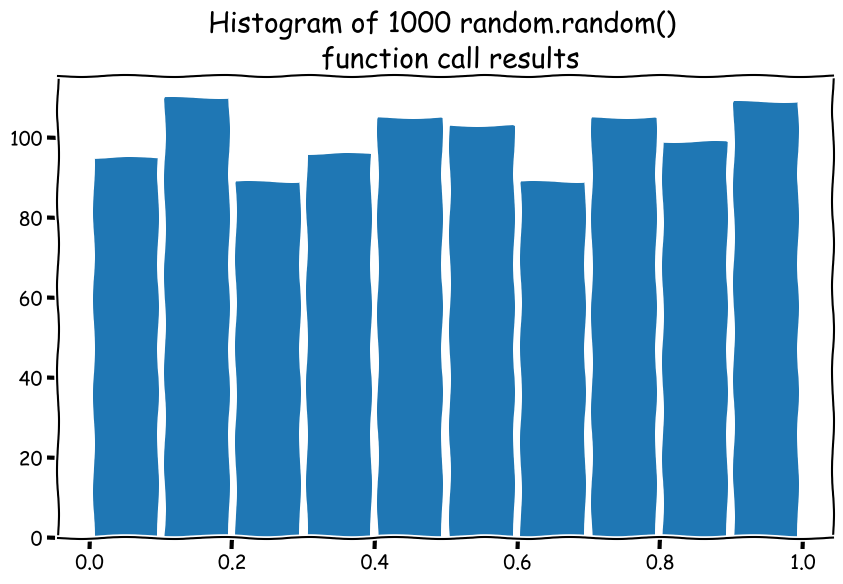

In [9]:
random.seed(2021)
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist([random.random() for _ in range(1000)],bins = 10,rwidth=0.9)
    ax.set_title("Histogram of 1000 random.random() \n function call results",fontsize=20)
    fig.savefig("img3.jpg")

### Visualization of first experiment

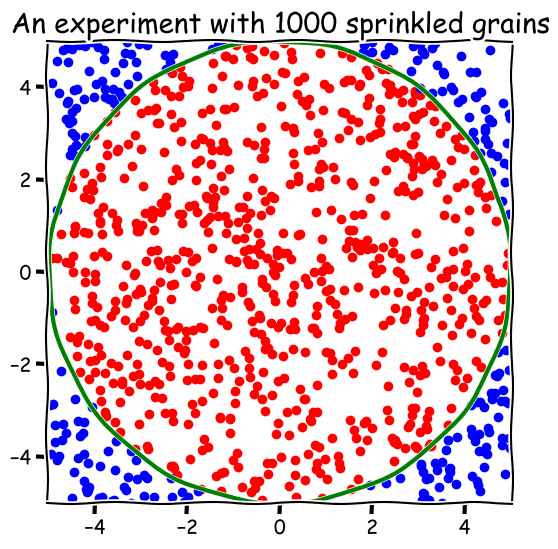

In [10]:
random.seed(2021)
edge = 10
num_grains = 1000
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6,6))
#     plt.axis("off") 
    plt.axis("equal")
    ax.set_xlim(-edge/2,edge/2)
    ax.set_ylim(-edge/2,edge/2)
    xs_in, ys_in = list(),list()
    xs_out,ys_out = list(),list()
    for g in range(num_grains):
            x, y = (random.random() - 0.5)*edge, (random.random() - 0.5)*edge
            if x**2 + y**2 <= (edge/2)**2:
                xs_in.append(x)
                ys_in.append(y)
            else:
                xs_out.append(x)
                ys_out.append(y)
    ax.scatter(xs_in,ys_in,color="r")
    ax.scatter(xs_out,ys_out,color="b")
    circle = plt.Circle((0,0),edge/2, fill = False, color = "g",lw=3)
    ax.add_patch(circle)
    ax.set_title("An experiment with 1000 sprinkled grains",fontsize=20)
    fig.savefig("img4.jpg")

### Draw histogram plot for the first experiment

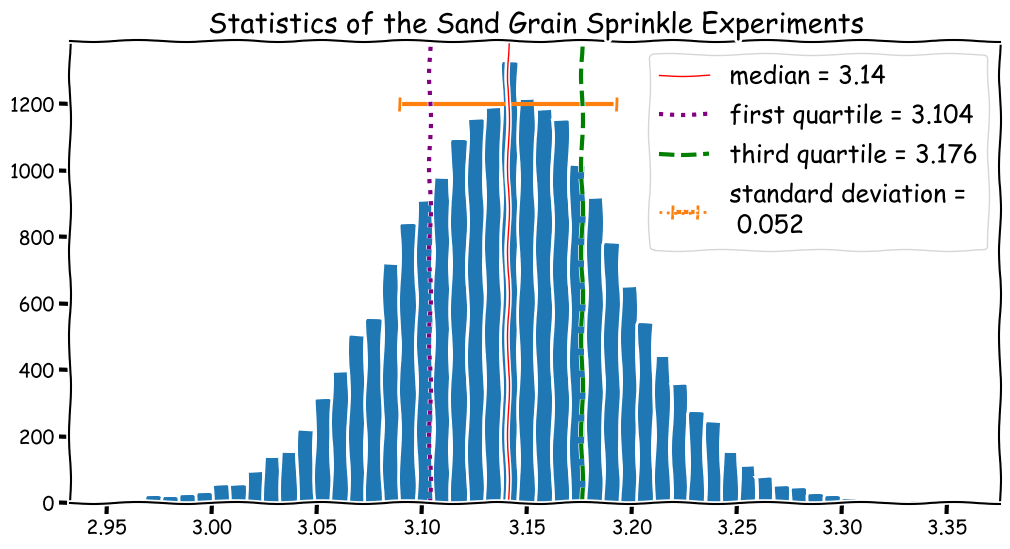

In [11]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12,6))
    ax.hist(pi_values,bins=50,rwidth=0.8);
    pi_mean = np.mean(pi_values)
    pi_median = np.median(pi_values)
    # pi_mean and pi_median are very close. Only median is plotted.
    pi_std = np.std(pi_values)
    pi_quartiles = np.quantile(pi_values, [0,0.25,0.5,0.75,1])
    ax.set_title("Statistics of the Sand Grain Sprinkle Experiments",fontsize=20)
    line_1 = ax.axvline(pi_mean, color = 'red', lw = 1)
    line_2 = ax.axvline(pi_quartiles[1], 
                        color = 'purple', 
                        lw = 3, 
                        linestyle = "dotted")
    line_3 = ax.axvline(pi_quartiles[3], 
                        color = 'green', 
                        lw = 3,
                        linestyle = "dashed")
    std_bar = ax.errorbar(pi_mean, 1200, 
                          xerr=pi_std,
                          capsize=5, 
                          elinewidth=3, 
                          markeredgewidth=2, 
                          linestyle = ":")
    ax.legend([line_1,line_2,line_3, std_bar],["median = {}".format(pi_median),
                                      "first quartile = {}".format(pi_quartiles[1]),
                                      "third quartile = {}".format(pi_quartiles[3]),
                                              "standard deviation =\n {}".format(round(pi_std,3))],fontsize=18)
    fig.savefig("img5.jpg")

### Picturing the land of goat problem

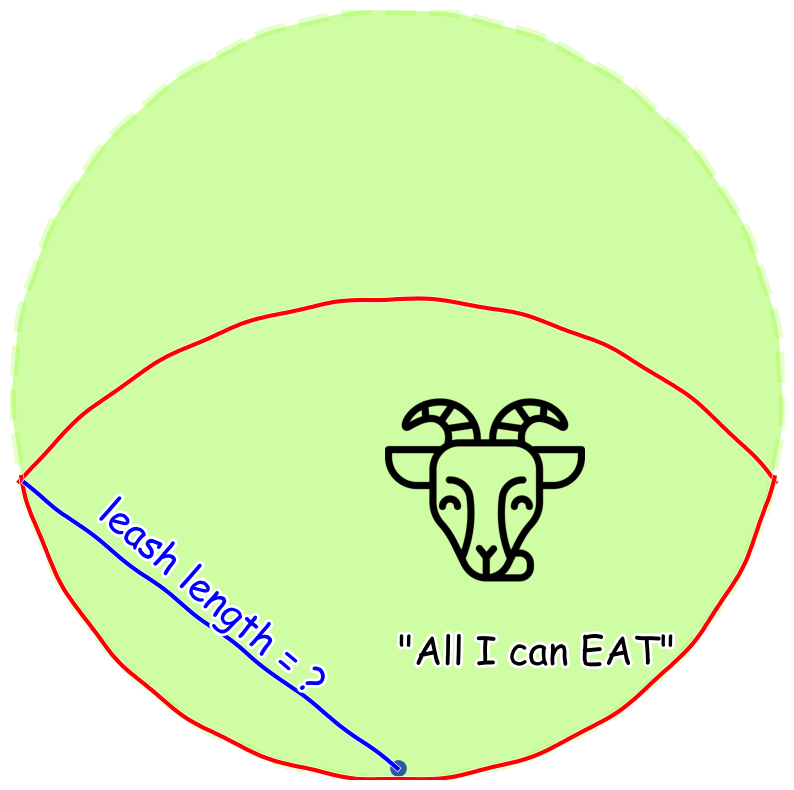

In [12]:
from matplotlib.patches import Arc
leash_length = 2.5
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10,10))
    ax.axis("equal")
    ax.axis("off")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    circle = plt.Circle((0,0),1, fill = True, color = "lawngreen", alpha = 0.2,lw=6,linestyle="dashed")
    ax.add_patch(circle)
    arc = Arc((0,-1),width = leash_length,height=leash_length, theta1 = 38, theta2 = 142, lw = 3, color = "red")
    ax.add_patch(arc)
    arc2 = Arc((0,0),width = 2,height=2, theta1 = -168 , theta2 = -12, lw = 3, color = "red")
    ax.add_patch(arc2)
    goat = plt.imread("goat.png") # goat
    ax_goat = fig.add_axes([0.5, 0.3, 0.2, 0.2])
    ax_goat.imshow(goat)
    ax_goat.axis("off")
    ax.text(-0.0,-0.7,"\"All I can EAT\"", fontsize=28)
    leash = ax.plot([0,-0.97],[-0.97,-0.23],lw=3,color="blue")
    ax.scatter([0],[-0.97],color = "blue",s = [120])
    ax.text(-0.8,-0.78,"leash length = ?", rotation =-40,fontsize=28, color="blue")
    fig.savefig("img6.jpg")

### Polar system explanation

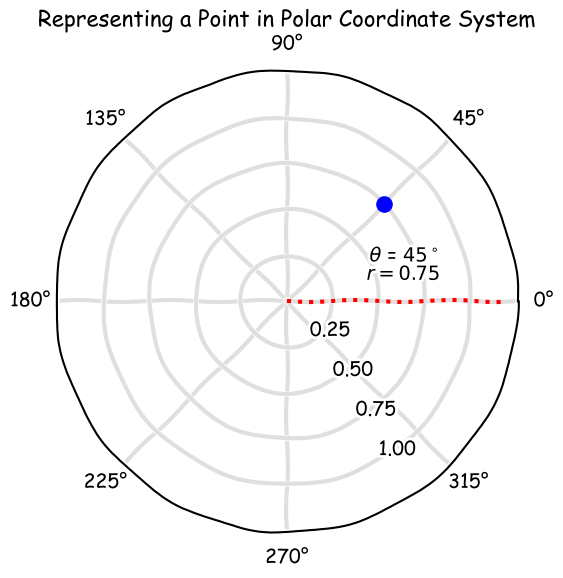

In [13]:
from matplotlib.patches import Arc
with plt.xkcd():
    fig, ax_polar = plt.subplots(figsize=(6,6),subplot_kw={'projection': 'polar'})
    ax_polar.set_rmax(1)
    ax_polar.set_rticks([0.25, 0.5, 0.75, 1],)
    ax_polar.set_rlabel_position(-60) 
    ax_polar.grid(True,linewidth=3,alpha=0.4)
    ax_polar.set_axisbelow(True)
    ax_polar.plot([0,0],[0,1.2],lw=3,color="red",linestyle="dotted")
    ax_polar.scatter([np.pi/4],[0.75],s=120,color = "blue")
    ax_polar.text(np.pi/7,0.5,r"$\theta$ = $45^\circ$")
    ax_polar.text(np.pi/12,0.45,r"$r = 0.75$")
    ax_polar.set_title("Representing a Point in Polar Coordinate System", fontsize=16)
    fig.savefig("img7.jpg")

#### Uniform Cartesian coordinate sampling

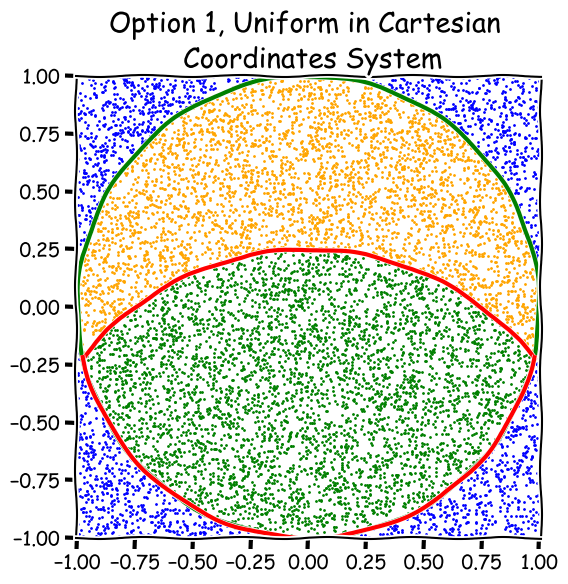

In [14]:
import random
random.seed(2021)
num_points = 10000
leash_length = 1.25
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6,6))
#     plt.axis("off") 
    plt.axis("equal")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    xs_in, ys_in = list(),list()
    xs_out,ys_out = list(),list()
    xs_goat, ys_goat = list(), list()
    for g in range(num_points):
            x, y = (random.random() - 0.5)*2, (random.random() - 0.5)*2
            if x**2 + y**2 <= 1:
                if (x-0)**2 + (y- (-1))**2 <= (leash_length)**2:
                    xs_goat.append(x)
                    ys_goat.append(y)
                else:
                    xs_in.append(x)
                    ys_in.append(y)
            else:
                xs_out.append(x)
                ys_out.append(y)
    ax.scatter(xs_in,ys_in,color="orange",s=1)
    ax.scatter(xs_out,ys_out,color="blue",s=1)
    ax.scatter(xs_goat,ys_goat,color="green",s=1)
    circle = plt.Circle((0,0),1, fill = False, color = "g",lw=3)
    ax.add_patch(circle)
    arc = Arc((0,-1),width = leash_length*2,height=leash_length*2, theta1 = 38, theta2 = 142, lw = 3, color = "red")
    ax.add_patch(arc)
    arc2 = Arc((0,0),width = 2,height=2, theta1 = -168 , theta2 = -12, lw = 3, color = "red")
    ax.add_patch(arc2)
    ax.set_title("Option 1, Uniform in Cartesian \n Coordinates System",fontsize=20)
    fig.savefig("img8.jpg")

In [15]:
print(len(xs_out),len(xs_in),len(xs_goat))

2101 3443 4456


#### Uniform polar system sampling

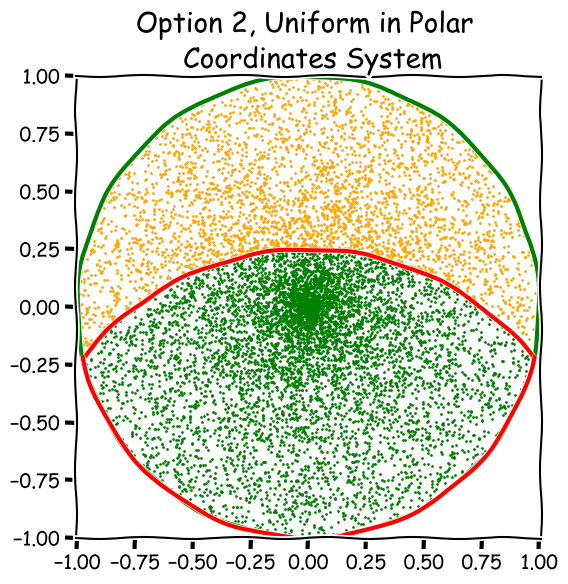

In [16]:
import random
random.seed(2021)
num_points = 10000
leash_length = 1.25
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6,6))
#     plt.axis("off") 
    plt.axis("equal")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    xs_in, ys_in = list(),list()
    xs_out,ys_out = list(),list()
    xs_goat, ys_goat = list(), list()
    for g in range(num_points):
            theta, r = random.random()*np.pi*2, random.random()
            x, y = r*np.cos(theta), r*np.sin(theta)
            if x**2 + y**2 <= 1:
                if (x-0)**2 + (y- (-1))**2 <= (leash_length)**2:
                    xs_goat.append(x)
                    ys_goat.append(y)
                else:
                    xs_in.append(x)
                    ys_in.append(y)
            else:
                xs_out.append(x)
                ys_out.append(y)
    ax.scatter(xs_in,ys_in,color="orange",s=1)
    ax.scatter(xs_out,ys_out,color="blue",s=1)
    ax.scatter(xs_goat,ys_goat,color="green",s=1)
    circle = plt.Circle((0,0),1, fill = False, color = "g",lw=3)
    ax.add_patch(circle)
    arc = Arc((0,-1),width = leash_length*2,height=leash_length*2, theta1 = 38, theta2 = 142, lw = 3, color = "red")
    ax.add_patch(arc)
    arc2 = Arc((0,0),width = 2,height=2, theta1 = -168 , theta2 = -12, lw = 3, color = "red")
    ax.add_patch(arc2)
    ax.set_title("Option 2, Uniform in Polar \n Coordinates System",fontsize=20)
    fig.savefig("img9.jpg")

In [17]:
print(len(xs_out),len(xs_in),len(xs_goat))

0 3230 6770


#### Zoom in polar coordinates graph

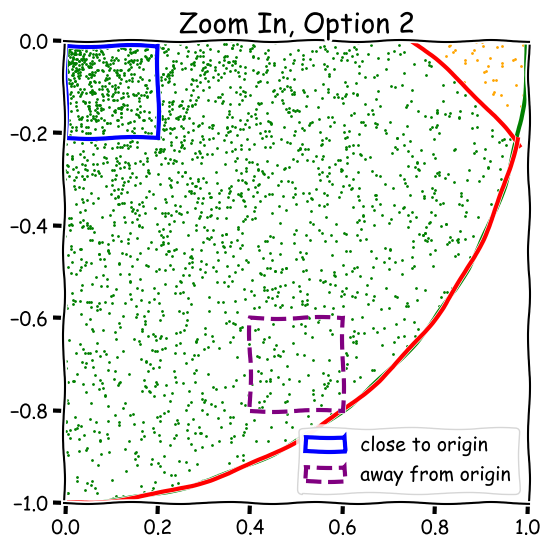

In [18]:
import random
from matplotlib.patches import Rectangle
random.seed(2021)
num_points = 10000
leash_length = 1.25
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6,6))
#     plt.axis("off") 
    plt.axis("equal")
    ax.set_xlim(0,1)
    ax.set_ylim(-1,0)
    xs_in, ys_in = list(),list()
    xs_out,ys_out = list(),list()
    xs_goat, ys_goat = list(), list()
    for g in range(num_points):
            theta, r = random.random()*np.pi*2, random.random()
            x, y = r*np.cos(theta), r*np.sin(theta)
            if x**2 + y**2 <= 1:
                if (x-0)**2 + (y- (-1))**2 <= (leash_length)**2:
                    xs_goat.append(x)
                    ys_goat.append(y)
                else:
                    xs_in.append(x)
                    ys_in.append(y)
            else:
                xs_out.append(x)
                ys_out.append(y)
    ax.scatter(xs_in,ys_in,color="orange",s=1)
    ax.scatter(xs_out,ys_out,color="blue",s=1)
    ax.scatter(xs_goat,ys_goat,color="green",s=1)
    circle = plt.Circle((0,0),1, fill = False, color = "g",lw=3)
    ax.add_patch(circle)
    arc = Arc((0,-1),width = leash_length*2,height=leash_length*2, theta1 = 38, theta2 = 142, lw = 3, color = "red")
    ax.add_patch(arc)
    arc2 = Arc((0,0),width = 2,height=2, theta1 = -168 , theta2 = -12, lw = 3, color = "red")
    ax.add_patch(arc2)
    ax.set_title("Zoom In, Option 2",fontsize=20)
    
    rect1 = Rectangle((0,-0.21), 0.2, 0.2, linewidth=3, edgecolor='blue', facecolor='none',linestyle="solid")
    ax.add_patch(rect1)
    rect2 = Rectangle((0.4,-0.8), 0.2, 0.2, linewidth=3, edgecolor='purple', facecolor='none',linestyle="dashed")
    ax.add_patch(rect2)
    ax.legend([rect1,rect2],["close to origin", "away from origin"])
    fig.savefig("img10.jpg")

#### Bisection search algorithm

In [19]:
random.seed(2021)
num_points = 10000
num_valid_points = 0
xs, ys = list(),list()
for g in range(num_points):
        x, y = (random.random() - 0.5)*2, (random.random() - 0.5)*2
        if x**2 + y**2 <= 1:
            xs.append(x)
            ys.append(y)
            num_valid_points += 1

# begin bisection
low, high, middle = 0, 2, 1
epsilon = 0.001 # 
while high-low > epsilon:
    reachable = sum((x-0)**2 + (y- (-1))**2 <= (middle)**2 for x,y in zip(xs,ys))
    if reachable > num_valid_points//2: # need to shorten the leash
        low, high, middle = low, middle, (low+middle)/2
    elif reachable < num_valid_points//2: # need to increase the leash
        low, high, middle = middle, high, (middle+high)/2
    else:
        break

print(middle)  

1.15869140625


In [20]:
reachable

3950

### Paper rock scissors: naive players

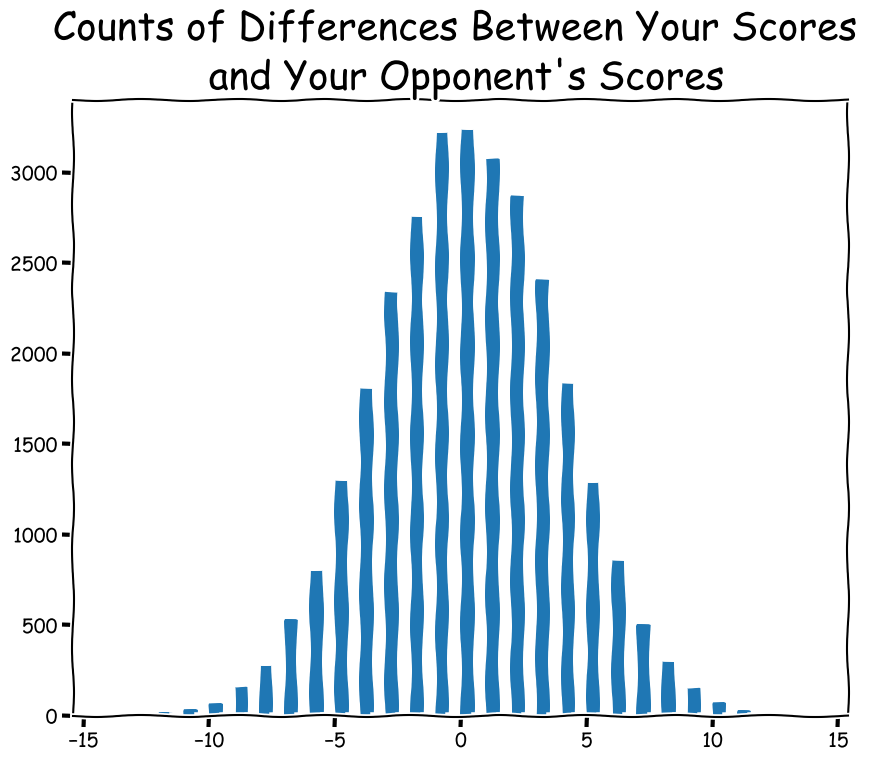

In [21]:
paper, rock, scissors = "paper", "rock","scissors"
from collections import OrderedDict

probs_2_move = OrderedDict({(0,1/3): paper, (1/3,2/3): rock, (2/3,1): scissors})

result_2_scores = {(paper,paper):(0.5,0.5),
         (rock,rock):(0.5,0.5),
         (scissors,scissors):(0.5,0.5),
         (scissors,rock):(0,1),
         (scissors,paper):(1,0),
         (rock,scissors):(1,0),
         (rock,paper):(0,1),
         (paper,rock):(1,0),
         (paper,scissors):(0,1)}

def generate_move(probs_2_move, num):
    for prob, move in probs_2_move.items():
        if prob[0] <= num and num <= prob[1]:
            return move


rounds = 30000
matches = 20

your_scores = list()
opponent_scores = list()
random.seed(2021)
for round in range(rounds):
    your_round_score = 0
    opponent_round_score = 0
    for match in range(matches):
        num1, num2 = random.random(), random.random()
        your_move, opponent_move = generate_move(probs_2_move,num1), generate_move(probs_2_move,num2)
        your_match_score, opponent_match_score = result_2_scores[(your_move, opponent_move)]
        your_round_score += your_match_score
        opponent_round_score += opponent_match_score
    your_scores.append(your_round_score)
    opponent_scores.append(opponent_round_score)

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10,8))
    ax.hist(np.array(your_scores) - np.array(opponent_scores),bins = np.linspace(-14,14,57),rwidth=1.5)
    ax.set_title("Counts of Differences Between Your Scores \n and Your Opponent's Scores",fontsize=28)
    fig.savefig("img11.jpg")

In [22]:
from collections import Counter
Counter(np.array(your_scores) - np.array(opponent_scores)< 0)

Counter({True: 13333, False: 16667})